In [ ]:
#Note sur la dépendance des paramètres à la température
Mathis Chevé, MOLONARI 2023

In [67]:
import numpy as np
from numpy import linalg as npln
import matplotlib
from matplotlib import pyplot as plt

plt.rcParams.update({'font.size': 20})
# plt.style.use('classic')
# print(plt.style.available)
taille_police = 20
fav_mark = ["^", "s", "o", "d"]
couleurs = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']

# Problème général

On cherche à solutionner le couple d'équations suivantes:

$$
\left\{\begin{array}{lll} 
S_s \partial_t h & = & \partial_z (K \partial_z h) \\
\rho_m c_m \partial_t T & = & \rho_w c_w q \partial_z T + \lambda_m \partial_z^2 T 
\end{array} \right.
\quad \text{avec} \quad  q = K \partial_z h \, \, ; \quad  K = \frac{k\rho_w g}{\mu_w} = \frac{k g}{\nu_w}
$$

## Etude de la variation des paramètres avec la température

On sait que les paramètres $\rho$, $c$, $\mu$ dépendent de la température comme suit:

- $\mu \approx A \exp(BT^{-1} + CT + DT^2) \quad \quad$ avec $\quad A = 1.856 \times 10^{−11} \, [mPa.s] \, ; \quad B = 4209 \, [K] \, ; \quad C = 0.04527 \, [K^{-1}] \, ; \quad D = −3.376 \times 10^{−5} \, [K^{-2}] $

- $c_p \approx c_p^0 + A (T - T_c) + B(T-T_c) \quad$ avec $\quad c_p^0 = 4.217 \, [J/kg/K] \, ; \quad A = -2.475 \times 10^{−3} \, [J/kg/K^2] \, ; \quad B = -2.839 \times 10^{−5} \, [J/kg/K^3] \, ; \quad T_c = 273.15 \, [K] \, $

- $\rho \approx \rho^0 + A (T - T_c) + B(T-T_c) \quad$ avec $\quad \rho^0 = 999 \, [kg/m^3] \, ; \quad A = 2.060 \times 10^{−2} \, [kg/m^3/K] \, ; \quad B = -5.416 \times 10^{−3} \, [kg/m^3/K^2] \, ; \quad T_c = 273.15 \, [K] \, $



Les calibration ont été faites dans le notebook "Etalonnage_Parameters_VS_temperature.ipynb"

La dépendance en température oblige donc à utiliser le couple d'équations suivant:

$$
\left\{\begin{array}{lll} 
S_s \partial_t h & = & \partial_z K \partial_z h + K \partial_z^2 h \\
\rho_m c_m \partial_t T & = & \rho_w c_w q \partial_z T + \lambda_m \partial_z^2 T 
\end{array} \right.
\quad \text{avec} \quad  q = K \partial_z h \, \, ; \quad  K = \frac{k\rho_w g}{\mu_w} = \frac{k g}{\nu_w}
$$

# Etude spécifique de ce notebook

On s'intéresse dans ce notebook à l'influence des corrections des paramètres sur la solution stationnaire.

On veux savoir s'il est possible de négliger les variations de $c_p$ et $\rho$. Cela limiterait la perte de temps de calcul due à la mise à jour des paramètres.

In [68]:
### Fonction des propriétés thermodynamiques

def Mu(T):
    """"
    Paramètres : T : Température ou Tableau de températures
    Résultat : mu : Viscosité à la température T selon l'approximation de 
                        https://en.wikipedia.org/wiki/Temperature_dependence_of_viscosity
    """
    A = 1.856e-11 * 1e-3
    B = 4209
    C = 0.04527
    D = -3.376e-5
    T = np.array(T)
    mu = A*np.exp(B*1./T + C*T + D*(T**2))
    return mu

def Rho_w(T):
    """"
    Paramètres : T : Température ou Tableau de températures
    Résultat : rho_w : Masse volumique à la température T selon l'approximation de
                        https://www.engineeringtoolbox.com/water-density-specific-weight-d_595.html
    """
    rho_w_0 =  9.99993828e2
    A       =  2.06084430e-2
    B       = -5.41602276e-3
    T = np.array(T)
    Tc = 273.15
    rho_w = rho_w_0 + A*(T-Tc) + B*(T-Tc)**2
    return rho_w

def C_w(T):
    """"
    Paramètres : T : Température ou Tableau de températures
    Résultat : rho_w : Masse volumique à la température T selon l'approximation de
                        https://www.engineeringtoolbox.com/water-density-specific-weight-d_595.html
    """
    C_w_0 =  4.21780753e3
    A     = -2.47509339e0
    B     = -2.83955125e-2

    T  = np.array(T)
    Tc = 273.15
    C_w = C_w_0 + A*(T-Tc) + B*(T-Tc)**2
    return C_w


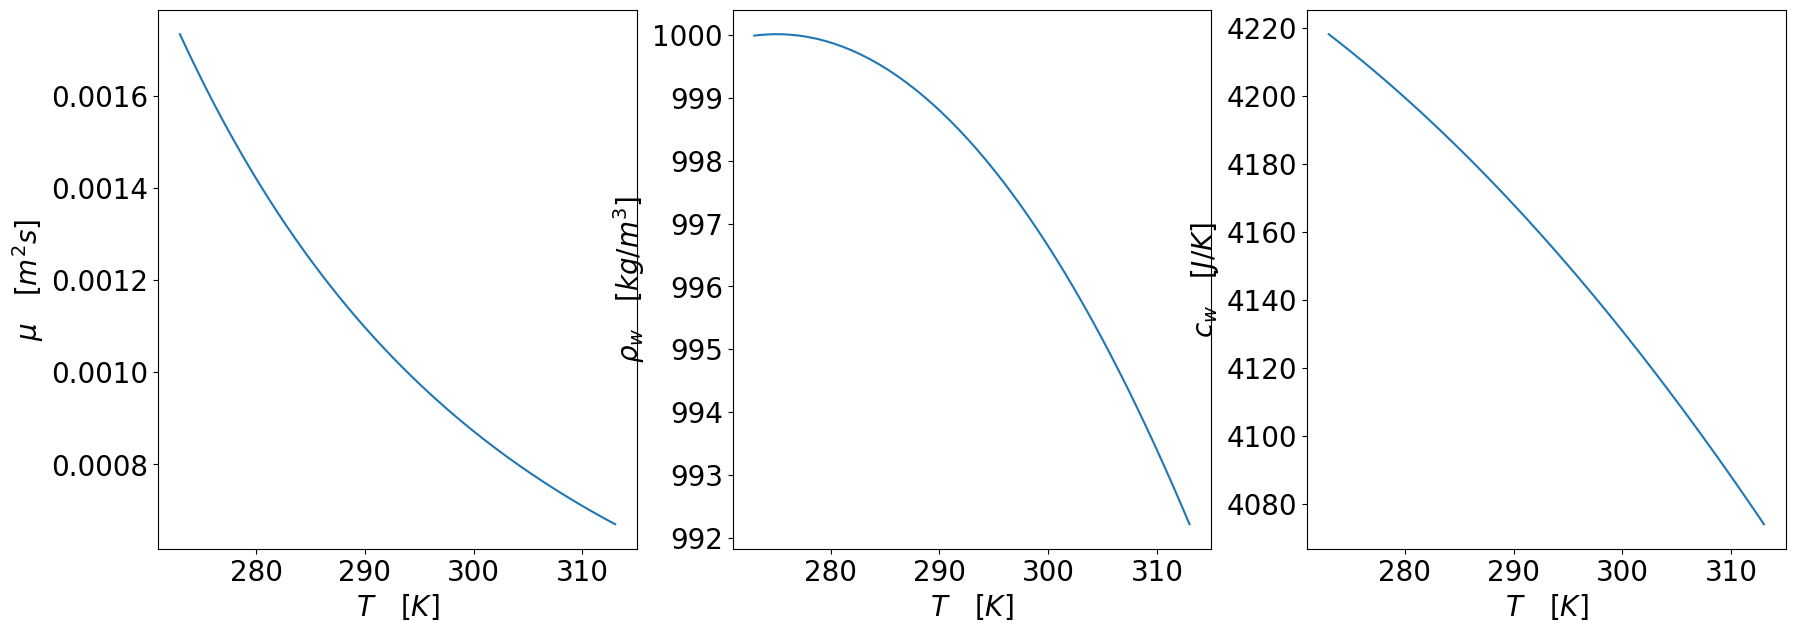

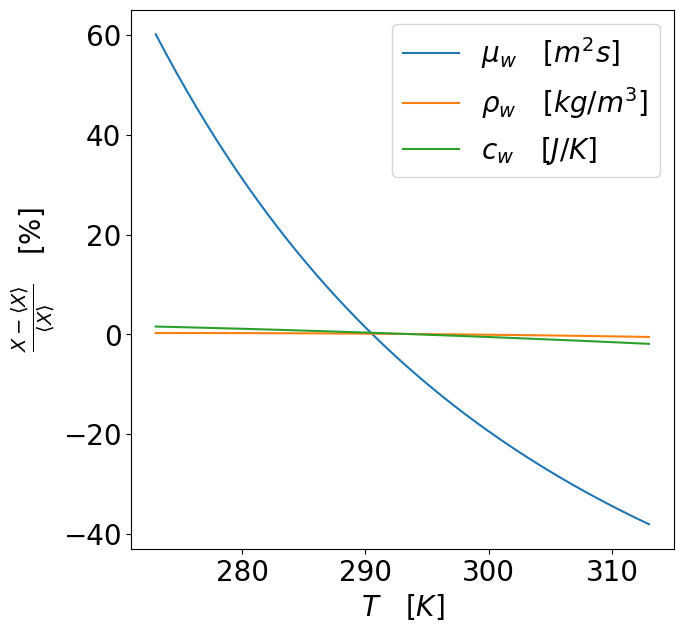

In [69]:
### Affichage des dépendances de température des propriétés thermodynamiques

T_aff     = np.linspace(273,313)
Mu_aff    = Mu(T_aff)
Rho_w_aff = Rho_w(T_aff)
C_w_aff   = C_w(T_aff)

plt.figure(figsize = (21,7))
plt.subplot(1,3,1)
plt.plot(T_aff,Mu_aff)
plt.xlabel(r"$T \quad [K]$"      , fontsize = 20)
plt.ylabel(r"$\mu \quad [m^2 s]$", fontsize = 20)

plt.subplot(1,3,2)
plt.plot(T_aff,Rho_w_aff)
plt.xlabel(r"$T \quad [K]$"          , fontsize = 20)
plt.ylabel(r"$\rho_w \quad [kg/m^3]$", fontsize = 20)

plt.subplot(1,3,3)
plt.plot(T_aff,C_w_aff)
plt.xlabel(r"$T \quad [K]$"    , fontsize = 20)
plt.ylabel(r"$c_w \quad [J/K]$", fontsize = 20)
plt.show()

plt.figure(figsize = (7,7))
plt.plot(T_aff, (Mu_aff   /np.mean(Mu_aff)    - 1)*100, label = r"$\mu_w \quad [m^2 s]$"  )
plt.plot(T_aff, (Rho_w_aff/np.mean(Rho_w_aff) - 1)*100, label = r"$\rho_w \quad [kg/m^3]$")
plt.plot(T_aff, (C_w_aff  /np.mean(C_w_aff)   - 1)*100, label = r"$c_w \quad [J/K]$"      )
plt.xlabel(r"$T \quad [K]$", fontsize = 20)
plt.ylabel(r"$\frac{X - \langle X \rangle}{\langle X \rangle} \quad [\%]$", fontsize = 20)
plt.legend()
plt.show()

Ce dernier graph nous montre que les changement les plus importants vont venir de la variation de viscosité.

In [70]:
### Définition des fonctions pour obtenir les matrices de dérivation et les conditions limites

def M_Dzz_h(N , H_nap_ad = 0, H_riv_ad = 1):
    """
    Paramètre :
        - N résoluation spatiale
    Résultat : 
        - Matrice de dérivation seconde de h, de taille N*N
        - Matrice de condition limites de la dérivée seconde de h, de taille N
    """
    M = np.zeros((N,N))
    M = np.eye(N,k=1) - 2*np.eye(N,k=0) + np.eye(N,k=-1)
    M[0,0] = -4
    M[0,1] = 4/3
    M[N-1,N-2] = 4/3
    M[N-1,N-1] = -4
    M = M*N**2
    
    CL = np.zeros(N)
    CL[0]   = - H_riv_ad * 8/3 * N**2      #Condition limite dans la rivière
    CL[N-1] = - H_nap_ad * 8/3 * N**2      #Condition limite dans l'aquifère

    return M, CL

def M_Dz_h(N , H_nap_ad = 0, H_riv_ad = 1):
    """
    Paramètre :
        - N résoluation spatiale
    Résultat : 
        - Matrice de dérivation première de h, de taille N*N
        - Matrice de condition limites de la dérivée première de h, de taille N
    """
    M = np.zeros((N,N))
    M = (np.eye(N,k=1) - np.eye(N,k=-1))/2
    M[0,1] = 2/3
    M[N-1,N-2] = -2/3
    M = M*N
    
    CL = np.zeros(N)
    CL[0]   = + H_riv_ad * 2/3 * N     #Condition limite dans la rivière
    CL[N-1] = - H_nap_ad * 2/3 * N     #Condition limite dans l'aquifère

    return M, CL


def M_Dz_T(N , T_nap_ad = 0, T_riv_ad = 1):
    """
    Paramètre :
        - N résoluation spatiale
    Résultat : 
        - Matrice de dérivation première de T, de taille N*N
        - Matrice de condition limites de la dérivée première de T, de taille N
    """
    M = np.zeros((N,N))
    M = (np.eye(N,k=1) - np.eye(N,k=-1))/2
    M[0,1] = 2/3
    M[N-1,N-2] = -2/3
    M = M*N
    
    CL = np.zeros(N)
    CL[0]   = + T_riv_ad * 2/3 * N     #Condition limite dans la rivière
    CL[N-1] = - T_nap_ad * 2/3 * N     #Condition limite dans l'aquifère

    return M, CL

def M_Dzz_T(N , T_nap_ad = 0, T_riv_ad = 1):
    """
    Paramètre :
        - N résoluation spatiale
    Résultat : 
        - Matrice de dérivation seconde de T, de taille N*N
        - Matrice de condition limites de la dérivée seconde de h, de taille N
    """
    M = np.zeros((N,N))
    M = np.eye(N,k=1) - 2*np.eye(N,k=0) + np.eye(N,k=-1)
    M[0,0] = -4
    M[0,1] = 4/3
    M[N-1,N-2] = 4/3
    M[N-1,N-1] = -4
    M = M*N**2
    
    CL = np.zeros(N)
    CL[0]   = - T_riv_ad * 8/3 * N**2      #Condition limite dans la rivière
    CL[N-1] = - T_nap_ad * 8/3 * N**2      #Condition limite dans l'aquifère

    return M, CL

def M_Dz_mu(N):
    """
    Paramètre :
        - N résoluation spatiale
    Résultat : 
        - Matrice de dérivation première de h, de taille N*N
        - Matrice de condition limites de la dérivée première de h, de taille N
    """
    M = np.zeros((N,N))
    M = (np.eye(N,k=1) - np.eye(N,k=-1))/2
    M[0,1] = +1
    M[0,0] = -1

    M[N-1,N-2] = -1
    M[N-1,N-1] = +1
    M = M*N
    
    return M


On considère le système adimensionné suivant:


$$
\left\{\begin{array}{rll} 
\gamma(\tilde{T}) \times \partial_{\tilde{t}} \tilde{H} & = & \zeta (\tilde{T}) \times \partial_{\tilde{z}} \tilde{H}  & + & \partial_{\tilde{z}}^2 \tilde{H} \\
\beta(\tilde{T}) \times \,  \partial_{\tilde{t}} \tilde{T}    & = & \alpha(\tilde{T}) \times \partial_{\tilde{z}} \tilde{H} \times \partial_{\tilde{z}} \tilde{T} & + & \partial_{\tilde{z}}^2 \tilde{T} 
\end{array} \right.
$$

avec:

$$
\tilde{z}= \frac{z}{h} \quad \quad \tilde{t}= \frac{t}{P} \quad \quad \tilde{H}= \frac{H - H_{nap}^o}{H_{riv}^o - H_{nap}^o} \quad \quad  \text{et} \quad \quad \tilde{T} = \frac{T - T_{nap}^o}{T_{riv}^o-T_{nap}^o} =  \frac{T - T_{nap}^o}{\Delta T^o}
$$

et

$$
\alpha = \frac{\rho_w c_w k g \Delta H}{\mu_w \lambda_m} \quad ; \quad \beta = \frac{\rho_m c_m h^2}{\lambda_m P }  \quad ; \quad  \gamma = \frac{\mu_w h^2 S_s}{k \rho_w g P}\\
\zeta = \mu_w \partial_{\tilde{z}} \left( \frac{1}{\mu_w} \right ) + \dfrac{\partial_{\tilde{z}} \rho }{\rho} + \dfrac{\partial_{\tilde{z}} k }{k} = - \frac{\partial_{\tilde{z}}  \mu_w }{  \mu_w } + \dfrac{\partial_{\tilde{z}} \rho }{\rho} + \dfrac{\partial_{\tilde{z}} k }{k}
$$

Dans le cas présent $\dfrac{\partial_{\tilde{z}} k }{k} =0$ car $k$ est indépendant de la température. Cepandant, la définition de $zeta$ est présenté comme suit pour ne pas qu'il y ait d'erreurs d'étourderie lors de l'adaptation de la méthode au cas bicouche, dans lequel $k$ varie avec la profondeur.

## Adaptation du schéma numérique

Comme vous l'aurez peut-être remarqué, le système n'est plus linéaire en $T$ ce qui empêche d'adopter un schéma complètement implicite.

On considère donc le schéma numérique suivant. Il est semi implicite:

$$
\left\{\begin{array}{rlll} 
\gamma (T^i) . (    H^{i+1} -    H^i ) / d\tau & = & \zeta  (T^i) . (D_h \times H^{i+1} - H_{1 \, CL}) & + & (D_{2h} \times H^{i+1} \, - H_{2 \, CL} \, ) \\
\beta(T^i)   . ( \, T^{i+1} - \, T^i ) / d\tau & = & \alpha (T^i) . (D_h \times H^{i+1} - H_{1 \, CL}) . (D_T \times T^{i+1} -  T_{1 \, CL}) & + & (D_{2T} \times T^{i+1} - \, T_{2 \, CL})
\end{array} \right.
$$


En adpotant un sysème semi implicite on peut continuer de résoudre le système comme s'il était découplé. De plus l'erreur faite ainsi est au moins d'ordre 2. En effet, la correction en température sur la valeur de $\alpha$, $\gamma$ et $\beta$ est au moins d'ordre 1. La différence entre $T^i$ et $T^{i+1}$ étant aussi d'ordre 1, on à une erreur d'ordre 2 en plus si on utilise $T^i$ au lieu de $T^{i+1}$.

On résoud donc selon le schéma suivant:

- $ H^{i+1} = (1 - \dfrac{d\tau}{\gamma (T^i)} . D_{2h} - \dfrac{d\tau \, \zeta  (T^i) }{\gamma (T^i)}  \, . D_{h} )^{-1} \times ( H^{i} - \dfrac{d\tau}{\gamma (T^i)} \, H_{2 \, CL} - \dfrac{d\tau \, \zeta  (T^i) }{\gamma (T^i)}  \, H_{1 \, CL})$
- $ \, T^{i+1} = (1 - \dfrac{ d\tau \, \alpha (T^i)}{\beta(T^i)} . (D_h \times H^{i+1} - H_{1 \, CL}) . D_T - \dfrac{ d\tau}{\beta(T^i)} \, D_{2T} ))^{-1} \times (T^{i}  - \dfrac{ d\tau \, \alpha (T^i)}{\beta(T^i)} . (D_h \times H^{i+1} - H_{1 \, CL}) . T_{1 \, CL} - \dfrac{ d\tau}{\beta(T^i)} \, T_{2 \, CL}) $





In [71]:
### Définition des fonctions pour calculer les paramètres alpha, beta et gamma

### Cas   dépendant de la température

def C_nd_adim(T, z, Dz_mu = []):
    """
    Paramètre :
        - T : Température adimensionnée 
    Résultat : 
        - Coefficients pour la résolution matricielle, dépendant de la température
    """
    T_dim = T*(T_riv - T_nap) + T_nap
    rho_m = rho_r*(1-n) + Rho_w(T_dim)*n
    c_m   = c_r  *(1-n) + C_w(T_dim)  *n
    
    alpha = Rho_w(T_dim) * C_w(T_dim) * k * g * Dh * 1./Mu(T_dim) / lambda_m
    beta  = rho_m * c_m * (h_adm**2) / (P*lambda_m)
    gamma = (h_adm**2 * Ss * Mu(T_dim) ) * 1./Rho_w(T_dim) / (k * g * P)
    
    if len(Dz_mu) == 0:
        zeta = 0 * T_dim
    else:
        zeta = - np.matmul(Dz_mu, Mu(T_dim)) * 1./Mu(T_dim)

    return alpha, beta, gamma, zeta

### Cas indépendant de la température

def C_nd_adim_cst(T, z, Dz_mu = []):
    """Paramètre :
        - T : Température adimensionnée 
    Résultat : 
        - Coefficients pour la résolution matricielle, indépendant de la température
    """

    T_dim = 283 + 0*T
    rho_m = rho_r*(1-n) + Rho_w(T_dim)*n
    c_m   = c_r  *(1-n) + C_w  (T_dim)*n
    
    alpha = Rho_w(T_dim) * C_w(T_dim) * k * g * Dh * 1./Mu(T_dim) / lambda_m
    beta  = rho_m        * c_m        * (h_adm**2)     / (P*lambda_m)
    gamma = (h_adm**2 * Ss * Mu(T_dim) ) * 1./Rho_w(T_dim) / (k * g * P)

    zeta = 0
    
    return alpha, beta, gamma, zeta


def C_nd_adim_mu_cor(T, z, Dz_mu = []):
    """Paramètre :
        - T : Température adimensionnée 
    Résultat : 
        - Coefficients pour la résolution matricielle, dépendant de la température uniquement par mu
    """

    T_dim  = T*(T_riv - T_nap) + T_nap
    Tc_dim = 273.15 + T*0

    rho_m = rho_r*(1-n) + Rho_w(Tc_dim)*n
    c_m   = c_r  *(1-n) + C_w  (Tc_dim)*n
    
    alpha = Rho_w(Tc_dim) * C_w(Tc_dim) * k * g * Dh * 1./Mu(T_dim) / lambda_m
    beta  = rho_m        * c_m        * (h_adm**2)     / (P*lambda_m)
    gamma = (h_adm**2 * Ss * Mu(T_dim) ) * 1./Rho_w(Tc_dim) / (k * g * P)

    if len(Dz_mu) == 0:
        zeta = 0 * T_dim
    else:
        zeta = - np.matmul(Dz_mu, Mu(T_dim)) * 1./Mu(T_dim)

    return alpha, beta, gamma, zeta

def C_nd_adim_rho_cor(T, z, Dz_mu = []):
    """Paramètre :
        - T : Température adimensionnée 
    Résultat : 
        - Coefficients pour la résolution matricielle, dépendant de la température uniquement par rho
    """

    T_dim  = T*(T_riv - T_nap) + T_nap
    Tc_dim = 273.15 + T*0

    rho_m = rho_r*(1-n) + Rho_w(T_dim) *n
    c_m   = c_r  *(1-n) + C_w  (Tc_dim)*n
    
    alpha = Rho_w(T_dim)* C_w(Tc_dim) * k * g * Dh * 1./Mu(Tc_dim) / lambda_m
    beta  = rho_m        * c_m        * (h_adm**2)     / (P*lambda_m)
    gamma = (h_adm**2 * Ss * Mu(Tc_dim) ) * 1./Rho_w(T_dim) / (k * g * P)

    if len(Dz_mu) == 0:
        zeta = 0 * T_dim
    else:
        zeta = - np.matmul(Dz_mu, Mu(Tc_dim)) * 1./Mu(Tc_dim)

    return alpha, beta, gamma, zeta

def C_nd_adim_cp_cor(T, z, Dz_mu = []):
    """Paramètre :
        - T : Température adimensionnée 
    Résultat : 
        - Coefficients pour la résolution matricielle, dépendant de la température uniquement par cp
    """

    T_dim  = T*(T_riv - T_nap) + T_nap
    Tc_dim = 273.15 + T*0

    rho_m = rho_r*(1-n) + Rho_w(Tc_dim)*n
    c_m   = c_r  *(1-n) + C_w  (T_dim) *n
    
    alpha = Rho_w(Tc_dim) * C_w(T_dim)* k * g * Dh * 1./Mu(Tc_dim) / lambda_m
    beta  = rho_m        * c_m        * (h_adm**2)     / (P*lambda_m)
    gamma = (h_adm**2 * Ss * Mu(Tc_dim) ) * 1./Rho_w(Tc_dim) / (k * g * P)

    if len(Dz_mu) == 0:
        zeta = 0 * T_dim
    else:
        zeta = - np.matmul(Dz_mu, Mu(Tc_dim)) * 1./Mu(Tc_dim)

    return alpha, beta, gamma, zeta

In [72]:
### Paramètres
## Physiques

T_riv = 273 + 25
T_nap = 273 +  5
h_riv = 25e-2
h_nap = 0
z_nap = 0.4

g         = 9.81
Dh        = h_riv - h_nap
lambda_m  = 1
rho_r     = 1e3
c_r       = 4e3
n         = 0.3
k         = 5e-10 ## entre -11 et -15
h_adm     = 0.4
P         = 60*60*24*365
s         = n
Ss        = s/z_nap

## Numériques

Nz        = 100
Nt        = 5000
Ntconv    = 25
dtau_conv = 100
dtau      = 0.001

print(C_nd_adim(1/2,1))

(4.437044595732116, 0.020554793008352598, 8.950669991836687e-07, 0.0)


In [73]:
def init(Nz, if_test = False):
    """Paramètre :
        - Nz : Résolution spatiale
        - if_test : Booléen pourchanger la condition initiale
    Résultat : 
        Liste des paramètres initiaux.
        Résolution du problème dans l'état stationnaire avec des paramètres (alpha, beta, gamme, zeta) indépendants de la température.
        - T_init : Température
        - h_init : Charge
        - A_init : Alpha
        - B_init : Beta
        - C_init : Gamma
        - D_init : Zeta
    """

    Z = np.linspace(1/(2*Nz),1-1/(2*Nz),Nz) # Profondeur adimensionnée
    
    ### Matrices de dérivation
    Dz_h , CL_Dz_h  = M_Dz_h (Nz)
    Dzz_h, CL_Dzz_h = M_Dzz_h(Nz)
    Dz_T , CL_Dz_T  = M_Dz_T (Nz)
    Dzz_T, CL_Dzz_T = M_Dzz_T(Nz)
    Dz_mu           = M_Dz_mu(Nz)

    print(np.shape(Dz_mu))
    ## Condition initiales

    alpha, beta, gamma, zeta = C_nd_adim_cst(0, Z, Dz_mu = Dz_mu)          # Calcul d'un profil initial avec des paramètres indépendants de la température
    A_init = np.zeros(Nz) + alpha
    B_init = np.zeros(Nz) + beta
    C_init = np.zeros(Nz) + gamma
    D_init = np.zeros(Nz) + zeta

    M_h  = zeta * Dz_h    + Dzz_h
    CL_h = zeta * CL_Dz_h + CL_Dzz_h

    h_init = np.matmul(npln.inv(M_h),CL_h)  # Profil linéaire pour h (solution stationnaire)

    Dzh     = np.matmul(Dz_h, h_init) - CL_Dz_h
    Dzh_tab = np.matmul(np.ones((Nz,1)), np.reshape(Dzh,(1,Nz)))

    if if_test:
        M_T  = Dzz_T
        CL_T = CL_Dzz_T
    else:
        M_T  = alpha * Dzh_tab * Dz_T    + Dzz_T
        CL_T = alpha * Dzh     * CL_Dz_T + CL_Dzz_T

    T_init = np.matmul(npln.inv(M_T),CL_T)        # Solution stationnaire pour T, avec des coefficients indépendant de T
    
    return T_init, h_init, A_init, B_init, C_init, D_init

In [74]:
def iter_H(dt, N, gamma, zeta, H_prec, H_nap_ad = 0, H_riv_ad = 1):

    # Calcul de h^{kt}

    gamma_tab = np.matmul(np.reshape(gamma,(N,1)), np.ones((1,N)))
    zeta_tab  = np.matmul(np.reshape(zeta ,(N,1)), np.ones((1,N)))
    
    Dz_h , CL_Dz_h  = M_Dz_h (N, H_nap_ad = H_nap_ad, H_riv_ad = H_riv_ad)
    Dzz_h, CL_Dzz_h = M_Dzz_h(N, H_nap_ad = H_nap_ad, H_riv_ad = H_riv_ad)

    M_eq_H     = np.eye(N) - dt * 1./gamma_tab * Dzz_h - dt * 1./gamma_tab * zeta_tab * Dz_h
    M_eq_H_inv = npln.inv(M_eq_H)
    CL_eq_H    = dt * 1./gamma * CL_Dzz_h + dt * 1./gamma * zeta * CL_Dz_h
    
    H_suiv = np.matmul(M_eq_H_inv, (H_prec - CL_eq_H) )

    return H_suiv

def iter_T(dt, N, alpha, beta, H_suiv, T_prec, T_riv_ad = 0, T_nap_ad = 1, H_nap_ad = 0, H_riv_ad = 1):

    # Calcul de T^{kt}

    alpha_tab = np.matmul(np.reshape(alpha,(N,1)), np.ones((1,N)))
    beta_tab  = np.matmul(np.reshape(beta ,(N,1)), np.ones((1,N)))

    Dz_h , CL_Dz_h  = M_Dz_h (N, H_nap_ad = H_nap_ad, H_riv_ad = H_riv_ad)
    Dz_T , CL_Dz_T  = M_Dz_T (N, T_nap_ad = T_nap_ad, T_riv_ad = T_riv_ad)
    Dzz_T, CL_Dzz_T = M_Dzz_T(N, T_nap_ad = T_nap_ad, T_riv_ad = T_riv_ad)

    Dzh       = np.matmul(Dz_h, H_suiv) - CL_Dz_h
    Dzh_tab   = np.matmul(np.reshape(Dzh  ,(N,1)), np.ones((1,N)))

    M_eq_T     = np.eye(N) - dt * alpha_tab * 1./beta_tab * Dzh_tab * Dz_T - dt * 1./beta_tab * Dzz_T
    M_eq_T_inv = npln.inv(M_eq_T)
    CL_eq_T    = dt * alpha * 1./beta * Dzh * CL_Dz_T + dt * 1./beta * CL_Dzz_T

    T_suiv = np.matmul(M_eq_T_inv, (T_prec - CL_eq_T) )

    return T_suiv

def iter_ABCD(N, H, T, A, B, C, D, kt, Dz_mu = [], if_mu_cst = False, if_cp_cst = False, if_rho_cst = False, param_adjust = 1):

    Z = np.linspace(1/(2*N),1-1/(2*N),N)

    # Calcul des paramètres adimensionnés
    if kt % param_adjust == 0:
        if if_mu_cst:
            alpha, beta, gamma, zeta = C_nd_adim_mu_cor (T[kt-1], Z, Dz_mu = Dz_mu)
        elif if_rho_cst:
            alpha, beta, gamma, zeta = C_nd_adim_rho_cor(T[kt-1], Z, Dz_mu = Dz_mu)
        elif if_cp_cst:
            alpha, beta, gamma, zeta = C_nd_adim_cp_cor (T[kt-1], Z, Dz_mu = Dz_mu)
        else:
            alpha, beta, gamma, zeta = C_nd_adim        (T[kt-1], Z, Dz_mu = Dz_mu)

    else:
        alpha = A[kt-1,:]
        beta  = B[kt-1,:]
        gamma = C[kt-1,:]
        zeta  = D[kt-1,:]
    
    A[kt,:] = alpha
    B[kt,:] = beta
    C[kt,:] = gamma
    D[kt,:] = zeta

    return alpha, beta, gamma


def iter_H_T(dt, N, H, T, A, B, C, D, kt, Dz_mu = [], T_riv_ad = 0, T_nap_ad = 1, H_nap_ad = 0, H_riv_ad = 1, if_mu_cst = False, if_cp_cst = False, if_rho_cst = False, param_adjust = 1):

    alpha = A[kt,:]
    beta  = B[kt,:]
    gamma = C[kt,:]
    zeta  = D[kt,:]

    # Calcul du H suivant
    H[kt] = iter_H(dt, N, gamma, zeta, H[kt-1],          H_nap_ad = H_nap_ad, H_riv_ad = H_riv_ad)

    # Calcul de T suivant
    T[kt] = iter_T(dt, N, alpha, beta, H[kt]  , T[kt-1], T_riv_ad = T_riv_ad, T_nap_ad = T_nap_ad, H_nap_ad = H_nap_ad, H_riv_ad = H_riv_ad)
    
    return None

def boucle_temps(dt, N_prf, N_tps, T_init, H_init, A_init, B_init, C_init, D_init, T_nap_ad = 0, T_riv_ad = 1, H_nap_ad = 0, H_riv_ad = 1,  if_mu_cst = False, if_cp_cst = False, if_rho_cst = False, param_adjust = 1):
    if np.shape(T_nap_ad) == ():
        T_nap_ad_temp = np.zeros(N_tps) + T_nap_ad
    else:
        T_nap_ad_temp = T_nap_ad

    if np.shape(T_riv_ad) == ():
        T_riv_ad_temp = np.zeros(N_tps) + T_riv_ad
    else:
        T_riv_ad_temp = T_riv_ad

    if np.shape(H_nap_ad) == ():
        H_nap_ad_temp = np.zeros(N_tps) + H_nap_ad
    else:
        H_nap_ad_temp = H_nap_ad

    if np.shape(H_riv_ad) == ():
        H_riv_ad_temp = np.zeros(N_tps) + H_riv_ad
    else:
        H_riv_ad_temp = H_riv_ad

    T = np.zeros((N_tps,N_prf)) # Temperature en fonction du temps et de l'espace
    H = np.zeros((N_tps,N_prf)) # Charge      en fonction du temps et de l'espace
    A = np.zeros((N_tps,N_prf))
    B = np.zeros((N_tps,N_prf))
    C = np.zeros((N_tps,N_prf))
    D = np.zeros((N_tps,N_prf))

    T[0,:] = T_init
    H[0,:] = H_init
    A[0,:] = A_init
    B[0,:] = B_init
    C[0,:] = C_init
    D[0,:] = D_init

    Dz_mu = M_Dz_mu(Nz)

    for kt in range(1, N_tps):
        iter_ABCD(    N_prf, H, T, A, B, C, D, kt, Dz_mu = Dz_mu, if_mu_cst = if_mu_cst, if_cp_cst = if_cp_cst, if_rho_cst = if_rho_cst, param_adjust = param_adjust)
        iter_H_T (dt, N_prf, H, T, A, B, C, D, kt, Dz_mu = Dz_mu, T_nap_ad = T_nap_ad_temp[kt], T_riv_ad = T_riv_ad_temp[kt], H_nap_ad = H_nap_ad_temp[kt], H_riv_ad = H_riv_ad_temp[kt],  if_mu_cst = if_mu_cst, if_cp_cst = if_cp_cst, if_rho_cst = if_rho_cst)
    
    return T, H, A, B, C, D



    """Paramètre :
        - N  : Résolution spatiale
        - dt : Pas temmporel
        Les tableaux H, T, A, B, C, D sont à deux dimensions, temporelle (dim0) et spatiale (dim1), H[kt, kz] avec kt indice de temps et kz indice de profondeur.
        - H  : Tableau ce la charge      en fonction du temps et de la profondeur : H[kt, kz] avec kt indice de temps et kz indice de profondeur.
        - T  : Tableau ce la température en fonction du temps et de la profondeur : T[kt, kz] avec kt indice de temps et kz indice de profondeur.


        - if_test : Booléen pourchanger la condition initiale
    Résultat : 
        Liste des paramètres initiaux.
        Résolution du problème dans l'état stationnaire avec des paramètres (alpha, beta, gamme, zeta) indépendants de la température.
        - T_init : Température
        - h_init : Charge
        - A_init : Alpha
        - B_init : Beta
        - C_init : Gamma
        - D_init : Zeta
    """


In [75]:
def compute_termes_eq(dt, t, T, H, A, B, C, T_nap_ad = 0, T_riv_ad = 1, H_nap_ad = 0, H_riv_ad = 1):
    
    (Nt, Nz) = np.shape(H)
    kt = int(t/dt)

    if kt > Nt:
        return "Error : t out of time limit"
    elif t < dt:
        return "Error : t < dt"
    else:
        if np.shape(T_nap_ad) == ():
            T_nap_ad_t = T_nap_ad
        else:
            T_nap_ad_t = T_nap_ad[kt]

        if np.shape(T_riv_ad) == ():
            T_riv_ad_t = T_riv_ad
        else:
            T_riv_ad_t = T_riv_ad[kt]

        if np.shape(H_nap_ad) == ():
            H_nap_ad_t = H_nap_ad
        else:
            H_nap_ad_t = H_nap_ad[kt]

        if np.shape(H_riv_ad) == ():
            H_riv_ad_t = H_riv_ad
        else:
            H_riv_ad_t = H_riv_ad[kt]
    
        Dz_h , CL_Dz_h  = M_Dz_h (Nz, H_nap_ad = H_nap_ad_t, H_riv_ad = H_riv_ad_t)
        Dzz_h, CL_Dzz_h = M_Dzz_h(Nz, H_nap_ad = H_nap_ad_t, H_riv_ad = H_riv_ad_t)
        Dz_T , CL_Dz_T  = M_Dz_T (Nz, T_nap_ad = T_nap_ad_t, T_riv_ad = T_riv_ad_t)
        Dzz_T, CL_Dzz_T = M_Dzz_T(Nz, T_nap_ad = T_nap_ad_t, T_riv_ad = T_riv_ad_t)

        Times_side = B[kt,:] * (T[kt,:] -  T[kt-1,:])/dt
        Darcy_side = A[kt,:] * (np.matmul(Dz_h, H[kt,:]) - CL_Dz_h) * (np.matmul(Dz_T , T[kt,:]) - CL_Dz_T )
        Diffu_side =                                                  (np.matmul(Dzz_T, T[kt,:]) - CL_Dzz_T)
        Times_side_H = C[kt,:] * (H[kt,:] - H[kt-1,:])/dt
        Diffu_side_H = (np.matmul(Dzz_h, H[kt,:]) - CL_Dzz_h)

    return Times_side, Darcy_side, Diffu_side, Times_side_H, Diffu_side_H

In [76]:
def afficher_CI(T_init, h_init, taille_police = 20):

    Nz = len(T_init)
    Z = np.linspace(1/(2*Nz),1-1/(2*Nz),Nz) # Profondeur adimensionnée

    ### Matrices de dérivation
    Dz_h , CL_Dz_h  = M_Dz_h (Nz)
    Dzz_h, CL_Dzz_h = M_Dzz_h(Nz)
    Dz_T , CL_Dz_T  = M_Dz_T (Nz)
    Dzz_T, CL_Dzz_T = M_Dzz_T(Nz)

    plt.figure(figsize =(14,7))
    plt.subplot(1,2,2)
    # plt.plot(h_init_aff, Z_aff)
    plt.plot(h_init, Z)
    plt.xlabel(r"$\tilde{h}$", fontsize = taille_police)
    plt.ylabel(r"$\tilde{z}$", fontsize = taille_police)
    plt.subplot(1,2,1)
    # plt.plot(T_init_aff, Z_aff)
    plt.plot(T_init, Z)
    plt.xlabel(r"$\tilde{T}$", fontsize = taille_police)
    plt.ylabel(r"$\tilde{z}$", fontsize = taille_police)
    plt.show()

    plt.figure(figsize =(14,7))
    plt.subplot(1,2,2)
    plt.plot(np.matmul(Dz_h, h_init) - CL_Dz_h, Z)
    plt.xlabel(r"$\partial_{\tilde{z}} \tilde{h}$", fontsize = taille_police)
    plt.ylabel(r"$\tilde{z}$"                     , fontsize = taille_police)
    plt.subplot(1,2,1)
    plt.plot(np.matmul(Dz_T, T_init) - CL_Dz_T, Z)
    plt.xlabel(r"$\partial_{\tilde{z}} \tilde{T}$", fontsize = taille_police)
    plt.ylabel(r"$\tilde{z}$"                     , fontsize = taille_police)
    plt.show()

    plt.figure(figsize =(14,7))
    plt.subplot(1,2,2)
    plt.plot(np.matmul(Dzz_h, h_init) - CL_Dzz_h, Z)
    plt.xlabel(r"$\partial_{\tilde{z}}^2 \tilde{h}$", fontsize = taille_police)
    plt.ylabel(r"$\tilde{z}$"                       , fontsize = taille_police)
    plt.subplot(1,2,1)
    plt.plot(np.matmul(Dzz_T, T_init) - CL_Dzz_T, Z)
    plt.xlabel(r"$\partial_{\tilde{z}}^2 \tilde{T}$", fontsize = taille_police)
    plt.ylabel(r"$\tilde{z}$"                       , fontsize = taille_police)
    plt.show()


def afficher_H_T_parapluie(dt, T, H, N_c = 10, taille_police = 20, N_dec = 2):

    (Nt, Nz) = np.shape(H)
    N_aff = int(Nt/N_c)

    Kt_aff = np.arange(0, Nt, N_aff)        # Indices de temps affichés
    Z = np.linspace(1/(2*Nz),1-1/(2*Nz),Nz) # Profondeur adimensionnée
    temps = np.arange(Nt)*dt
    ## Parapluies

    plt.figure(figsize = (14,7), num = 11)
    for kt in Kt_aff:
        plt.subplot(1,2,1)
        plt.plot(T[kt,:], Z, label = r"$\tilde{t} = " + str(int(temps[kt]*10**N_dec)/10**N_dec) + "$")
        plt.subplot(1,2,2)
        plt.plot(H[kt,:], Z, label = r"$\tilde{t} = " + str(int(temps[kt]*10**N_dec)/10**N_dec) + "$")
    plt.subplot(1,2,1)
    plt.legend()
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$\tilde{T}$" , fontsize = taille_police)
    plt.subplot(1,2,2)
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$\tilde{h}$" , fontsize = taille_police)
    plt.legend()
    plt.show()

    return None

def afficher_ABC_parapluie(dt, A, B, C, N_c = 10, taille_police = 20, N_dec = 2):

    (Nt, Nz) = np.shape(A)
    N_aff = int(Nt/N_c)

    Kt_aff = np.arange(0, Nt, N_aff)        # Indices de temps affichés
    Z = np.linspace(1/(2*Nz),1-1/(2*Nz),Nz) # Profondeur adimensionnée
    temps = np.arange(Nt)*dt

    plt.figure(figsize = (21,7), num = 12)
    for kt in Kt_aff:
        plt.subplot(1,3,1)
        plt.plot(A[kt,:], Z, label = r"$\tilde{t} = " + str(int(temps[kt]*10**N_dec)/10**N_dec) + "$")
        plt.subplot(1,3,2)
        plt.plot(B[kt,:], Z, label = r"$\tilde{t} = " + str(int(temps[kt]*10**N_dec)/10**N_dec) + "$")
        plt.subplot(1,3,3)
        plt.plot(C[kt,:], Z, label = r"$\tilde{t} = " + str(int(temps[kt]*10**N_dec)/10**N_dec) + "$")
    plt.subplot(1,3,1)
    plt.legend()
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$A$"         , fontsize = taille_police)
    plt.subplot(1,3,2)
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$B$"         , fontsize = taille_police)
    plt.legend()
    plt.subplot(1,3,3)
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$C$"         , fontsize = taille_police)
    plt.legend()
    plt.show()
        
    return None

def afficher_H_T(kt, T, H, nom, taille_police = 20, N_dec = 2, if_add_curve=False, marker = '^', markevery = 5, linestyle = '-'):

    (Nt, Nz) = np.shape(H)
    Z = np.linspace(1/(2*Nz),1-1/(2*Nz),Nz) # Profondeur adimensionnée

    plt.figure(figsize = (14,7), num = 11)

    plt.subplot(1,2,1)
    plt.plot(T[kt,:], Z, label = nom, marker = marker, markevery = markevery, linestyle = linestyle)
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$\tilde{T}$" , fontsize = taille_police)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(H[kt,:], Z, label = nom, marker = marker, markevery = markevery, linestyle = linestyle)
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$\tilde{h}$" , fontsize = taille_police)
    
    if if_add_curve:
        pass
    else:
        plt.show()

    return None

def afficher_ABC(kt, A, B, C, nom, taille_police = 20, N_dec = 2, if_add_curve=False, marker = '^', markevery = 5, linestyle = '-'):

    (Nt, Nz) = np.shape(A)
    Z = np.linspace(1/(2*Nz),1-1/(2*Nz),Nz) # Profondeur adimensionnée

    plt.figure(figsize = (21,7), num = 12)

    plt.subplot(1,3,1)
    plt.plot(A[kt,:], Z, label = nom, marker = marker, markevery = markevery, linestyle = linestyle)
    plt.subplot(1,3,2)
    plt.plot(B[kt,:], Z, label = nom, marker = marker, markevery = markevery, linestyle = linestyle)
    plt.subplot(1,3,3)
    plt.plot(C[kt,:], Z, label = nom, marker = marker, markevery = markevery, linestyle = linestyle)
    
    plt.subplot(1,3,1)
    plt.legend()
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$A$"         , fontsize = taille_police)
    plt.subplot(1,3,2)
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$B$"         , fontsize = taille_police)
    plt.legend()
    plt.subplot(1,3,3)
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$C$"         , fontsize = taille_police)
    plt.legend()

    if if_add_curve:
        pass
    else:
        plt.show()

    return None
        
    return None

def afficher_difference(dt, T1, T2, H1, H2, label1 = "1", label2 = "2", nfig = 12, if_percent = True):

    (Nt, Nz) = np.shape(T1)
    temps = np.arange(Nt)*dt

    dT_max = np.max (np.abs(T1 - T2), axis = 1)
    dT_mean= np.mean(np.abs(T1 - T2), axis = 1)
    dH_max = np.max (np.abs(H1 - H2), axis = 1)
    dH_mean= np.mean(np.abs(H1 - H2), axis = 1)
    if if_percent:
        dT_max = dT_max *100
        dT_mean= dT_mean*100
        dH_max = dH_max *100
        dH_mean= dH_mean*100

    plt.figure(figsize = (14,7), num = nfig)

    plt.subplot(1,2,1)
    plt.plot(temps, dT_mean, label = r"$\langle |T_{ " + label1 + "}- T_{" + label2 + r"}| \rangle $")
    plt.plot(temps, dT_max , label = r"$\max(   |T_{ " + label1 + "}- T_{" + label2 + r"}|)$")
    plt.xlabel(r"$\tilde{t}$" , fontsize = taille_police)
    plt.legend()
    if if_percent:
        plt.ylabel(r"$dT \quad \%$", fontsize = taille_police)
    else:
        plt.yscale('log')
        plt.ylabel(r"$dT$"         , fontsize = taille_police)

    plt.subplot(1,2,2)
    plt.plot(temps, dH_mean, label = r"$\langle |H_{ " + label1 + "}- H_{" + label2 + r"}| \rangle $")
    plt.plot(temps, dH_max , label = r"$\max(   |H_{ " + label1 + "}- H_{" + label2 + r"}|)$")
    plt.xlabel(r"$\tilde{t}$" , fontsize = taille_police)
    plt.legend()
    if if_percent:
        plt.ylabel(r"$dH \quad \%$", fontsize = taille_police)
    else:
        plt.yscale('log')
        plt.ylabel(r"$dH$"         , fontsize = taille_police)
    plt.show()

    return None

def afficher_convergence(dt, T, H, A, B, C, nfig = 13):

    (Nt, Nz) = np.shape(T)
    temps = np.arange(Nt-1)*dt

    ### Calcul de la vitesse de convergence

    dA = np.mean(np.abs(np.diff(A, axis = 0)), axis = 1)
    dB = np.mean(np.abs(np.diff(B, axis = 0)), axis = 1)
    dC = np.mean(np.abs(np.diff(C, axis = 0)), axis = 1)
    dH = np.mean(np.abs(np.diff(H, axis = 0)), axis = 1)
    dT = np.mean(np.abs(np.diff(T, axis = 0)), axis = 1)

    plt.figure(figsize = (7,7), num = nfig)
    plt.plot(temps, dA/dt, label = r"$A$")
    plt.plot(temps, dB/dt, label = r"$B$")
    plt.plot(temps, dC/dt, label = r"$C$")
    plt.plot(temps, dT/dt, label = r"$T$")
    plt.plot(temps, dH/dt, label = r"$H$")
    plt.ylabel(r"$\langle |\, d[\, \, ] \, / \, dt \, | \rangle $" , fontsize = taille_police)
    plt.xlabel(r"$\tilde{t}$"                                      , fontsize = taille_police)
    plt.yscale('log')
    plt.legend()
    plt.show()

    return None

def afficher_evolution_temp(dt, z, T, H, nfig = 9, N_dec = 2, if_add_curve = False, linestyle = "-"):

    (Nt, Nz) = np.shape(T)
    temps = np.arange(Nt)*dt

    kz = int(z*Nz)

    T_z = T[:,kz]
    H_z = H[:,kz]

    plt.figure(figsize = (14,7), num = nfig)
    plt.subplot(1,2,1)
    plt.plot(temps, T_z, linestyle = linestyle, label = r"$T(z =" + str(int(z*10**N_dec)/10**N_dec) + ")$")
    plt.ylabel(r"$\tilde{T}$" , fontsize = taille_police)
    plt.xlabel(r"$\tilde{t}$" , fontsize = taille_police)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(temps, H_z, linestyle = linestyle, label = r"$H(z =" + str(int(z*10**N_dec)/10**N_dec) + ")$")
    plt.ylabel(r"$\tilde{H}$" , fontsize = taille_police)
    plt.xlabel(r"$\tilde{t}$" , fontsize = taille_police)
    plt.legend()
    
    if if_add_curve:
        pass
    else:
        plt.show()
    return None

def affichage_termes_eq(t, Times_side, Darcy_side, Diffu_side, Times_side_H, Diffu_side_H, N_dec = 1):

    Nz = len(Times_side)
    Z = np.linspace(1/(2*Nz),1-1/(2*Nz),Nz) # Profondeur adimensionnée

    plt.figure(figsize = (14,7))
    plt.subplot(1,2,1)
    plt.title(r"T equilibruim at $ t = " + str(int(t*10**N_dec)/10**N_dec) + r"$")

    plt.plot(Times_side, Z, marker = fav_mark[0], markevery = (0,10),  label = "Times")
    plt.plot(Darcy_side, Z, marker = fav_mark[1], markevery = (2,10),  label = "Darcy")
    plt.plot(Diffu_side, Z, marker = fav_mark[2], markevery = (4,10),  label = "Diffu")
    plt.plot(Times_side - Darcy_side - Diffu_side, Z, marker = fav_mark[3], markevery = (6,10),  label = "sum")
    plt.legend()

    plt.subplot(1,2,2)
    plt.title(r"H equilibruim at $ t = " + str(int(t*10**N_dec)/10**N_dec) + r"$")

    plt.plot(Times_side_H, Z, marker = fav_mark[0], markevery = (6,10),  label = "Times")
    plt.plot(0,0)
    plt.plot(Diffu_side_H, Z, marker = fav_mark[2], markevery = (3,10),  label = "Diffu")
    plt.plot(Times_side_H - Diffu_side_H, Z, marker = fav_mark[3], markevery = (0,10),  label = "sum")
    plt.plot()
    plt.legend()

    return None

(100, 100)


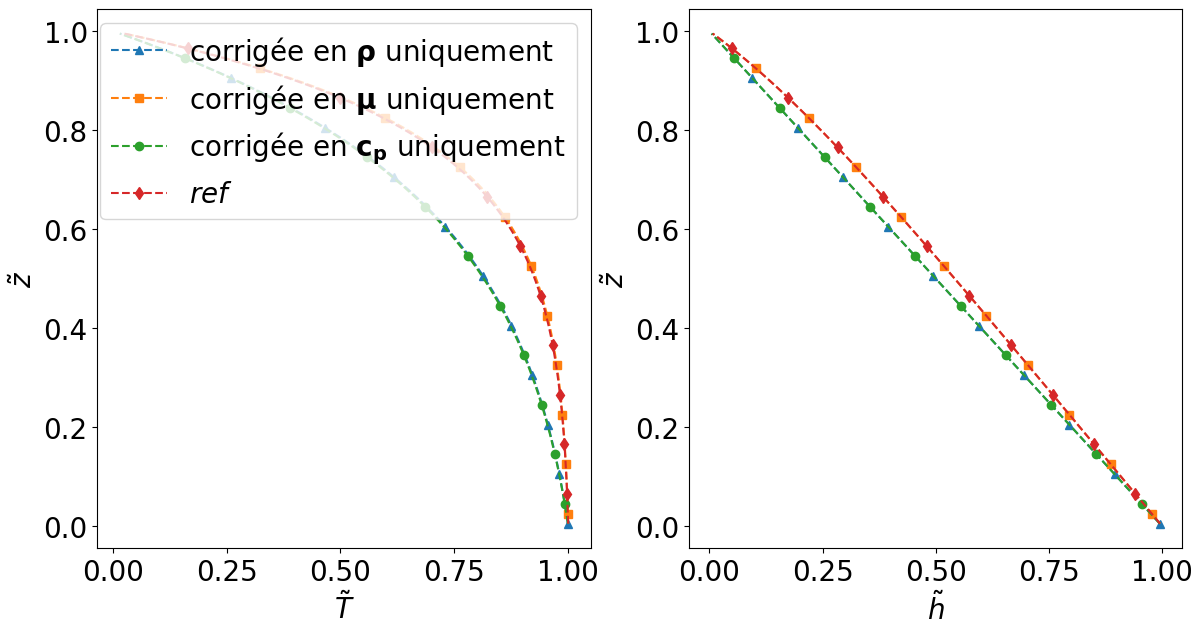

In [77]:
### Solution stationnaire dépendante de la température

T_init, H_init, A_init, B_init, C_init, D_init = init(Nz, if_test = False)
T_ref , H_ref , A_ref , B_ref , C_ref , D_ref  = boucle_temps(dtau_conv, Nz, Ntconv, T_init, H_init, A_init, B_init, C_init, D_init)
T_rho , H_rho , A_rho , B_rho , C_rho , D_rho  = boucle_temps(dtau_conv, Nz, Ntconv, T_init, H_init, A_init, B_init, C_init, D_init, if_rho_cst=True)
T_mu  , H_mu  , A_mu  , B_mu  , C_mu  , D_mu   = boucle_temps(dtau_conv, Nz, Ntconv, T_init, H_init, A_init, B_init, C_init, D_init, if_mu_cst =True)
T_cp  , H_cp  , A_cp  , B_cp  , C_cp  , D_cp   = boucle_temps(dtau_conv, Nz, Ntconv, T_init, H_init, A_init, B_init, C_init, D_init, if_cp_cst =True)

afficher_H_T(Ntconv-1, T_rho, H_rho, r"corrigée en $\bf{\rho}$ uniquement", if_add_curve=True, marker = fav_mark[0], markevery = (0,10), linestyle='--')
afficher_H_T(Ntconv-1, T_mu , H_mu , r"corrigée en $\bf{\mu }$ uniquement", if_add_curve=True, marker = fav_mark[1], markevery = (2,10), linestyle='--')
afficher_H_T(Ntconv-1, T_cp , H_cp , r"corrigée en $\bf{c_p }$ uniquement", if_add_curve=True, marker = fav_mark[2], markevery = (4,10), linestyle='--')
afficher_H_T(Ntconv-1, T_ref, H_ref, r"$ref$", if_add_curve=True, marker = fav_mark[3], markevery = (6,10), linestyle='--')


# Redimensionnement

In [78]:
def redimensionnement(dt, T, H, h_dim, h_nap, h_riv, T_riv, T_nap, P, T_nap_ad = 0, T_riv_ad = 1, H_nap_ad = 0, H_riv_ad = 1):
    
    (Nt, Nz) = np.shape(H)
    Z = np.linspace(1/(2*Nz),1-1/(2*Nz),Nz) # Profondeur adimensionnée
    temps = np.arange(Nt)*dt*(P/(60**2))

    if np.shape(T_nap_ad) == ():
        T_nap_ad_temp = np.zeros(Nt) + T_nap_ad
    else:
        T_nap_ad_temp = T_nap_ad

    if np.shape(T_riv_ad) == ():
        T_riv_ad_temp = np.zeros(Nt) + T_riv_ad
    else:
        T_riv_ad_temp = T_riv_ad

    if np.shape(H_nap_ad) == ():
        H_nap_ad_temp = np.zeros(Nt) + H_nap_ad
    else:
        H_nap_ad_temp = H_nap_ad

    if np.shape(H_riv_ad) == ():
        H_riv_ad_temp = np.zeros(Nt) + H_riv_ad
    else:
        H_riv_ad_temp = H_riv_ad

    ### Affichage conditions initiales

    Z_aff = np.zeros(Nz+2)
    Z_aff[1:Nz+1] = Z
    Z_aff[0]      = 0
    Z_aff[Nz+1]   = 1
    Z_aff = - Z_aff * h_dim

    H_aff = np.zeros((Nt, Nz+2))
    H_aff[:, 1:Nz+1] = H
    H_aff[:, 0]      = H_riv_ad_temp
    H_aff[:, Nz+1]   = H_nap_ad_temp
    H_aff = H_aff * (h_riv - h_nap) + h_nap

    T_aff = np.zeros((Nt, Nz+2))
    T_aff[:, 1:Nz+1] = T
    T_aff[:, 0]      = T_riv_ad_temp
    T_aff[:, Nz+1]   = T_nap_ad_temp
    T_aff = T_aff * (T_riv - T_nap) + T_nap

    return temps, Z_aff, T_aff, H_aff

def afficher_H_T_parapluie_dim(temps, Z_aff, T_aff, H_aff, N_c = 10, taille_police = 20, N_dec = 2, times = []):

    dt = temps[1] - temps[0]
    (Nt, Nz) = np.shape(H)
    if len(times) == 0:
        N_aff = int(Nt/N_c)
        Kt_aff = np.arange(0, Nt, N_aff) # Indices de temps affichés
    else:
        Kt_aff = np.around(times/dt)      # Indices de temps affichés

    ## Parapluies

    plt.figure(figsize = (14,7), num = 111)
    for kt in Kt_aff:
        kt = int(kt)
        plt.subplot(1,2,1)
        plt.plot(T_aff[kt,:], Z_aff, label = r"$t = " + str(int(temps[kt]*10**N_dec)/10**N_dec) + "\quad [h]$")
        plt.subplot(1,2,2)
        plt.plot(H_aff[kt,:], Z_aff, label = r"$t = " + str(int(temps[kt]*10**N_dec)/10**N_dec) + "\quad [h]$")
    plt.subplot(1,2,1)
    plt.legend()
    plt.ylabel(r"$z$" , fontsize = taille_police)
    plt.xlabel(r"$T$" , fontsize = taille_police)
    plt.subplot(1,2,2)
    plt.ylabel(r"$z$"        , fontsize = taille_police)
    plt.xlabel(r"$\Delta h$" , fontsize = taille_police)
    plt.show()

    return None

def afficher_H_T_dim(Z_aff, T_aff, H_aff, nom, taille_police = 20, N_dec = 2, if_add_curve=False, marker = '^', markevery = 5, linestyle = '-', couleur = ""):

    (Nt, Nz) = np.shape(H_aff)
    kt = Nt-1
    
    plt.figure(figsize = (14,7), num = 119)

    plt.subplot(1,2,1)
    if couleur == "":
        plt.plot(T_aff[kt,:], Z_aff, label = nom, marker = marker, markevery = markevery, linestyle = linestyle)
    else:
        plt.plot(T_aff[kt,:], Z_aff, label = nom, marker = marker, markevery = markevery, linestyle = linestyle, color = couleur)
    plt.ylabel(r"$z$" , fontsize = taille_police)
    plt.xlabel(r"$T$" , fontsize = taille_police)
    plt.legend()

    plt.subplot(1,2,2)
    if couleur == "":
        plt.plot(H_aff[kt,:], Z_aff, label = nom, marker = marker, markevery = markevery, linestyle = linestyle)
    else:
        plt.plot(H_aff[kt,:], Z_aff, label = nom, marker = marker, markevery = markevery, linestyle = linestyle, color = couleur)
    plt.ylabel(r"$z$"        , fontsize = taille_police)
    plt.xlabel(r"$\Delta h$" , fontsize = taille_police)
    
    if if_add_curve:
        pass
    else:
        plt.show()
    return None


def afficher_difference_dim(temps, T1, T2, H1, H2, taille_police = 20, label1 = "1", label2 = "2", nfig = 112):

    dT_max = np.max (np.abs(T1 - T2), axis = 1)
    dT_mean= np.mean(np.abs(T1 - T2), axis = 1)
    dH_max = np.max (np.abs(H1 - H2), axis = 1)
    dH_mean= np.mean(np.abs(H1 - H2), axis = 1)

    plt.figure(figsize = (14,7), num = nfig)

    plt.subplot(1,2,1)
    plt.plot(temps, dT_mean, label = r"$\langle |T_{ " + label1 + "}- T_{" + label2 + r"}| \rangle $")
    plt.plot(temps, dT_max , label = r"$\max(   |T_{ " + label1 + "}- T_{" + label2 + r"}|)$")
    plt.xlabel(r"$t  \quad [h]$", fontsize = taille_police)
    plt.ylabel(r"$dT \quad [K]$", fontsize = taille_police)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(temps, dH_mean, label = r"$\langle |H_{ " + label1 + "}- H_{" + label2 + r"}| \rangle $")
    plt.plot(temps, dH_max , label = r"$\max(   |H_{ " + label1 + "}- H_{" + label2 + r"}|)$")
    plt.xlabel(r"$t  \quad [h]$", fontsize = taille_police)
    plt.ylabel(r"$dH \quad [m]$", fontsize = taille_police)
    plt.legend()
    plt.show()

    return None

def afficher_deux_courbes_dim(dt, Z_aff, T1, T2, H1, H2, time = 0, taille_police = 20, label1 = "1", label2 = "2", nfig = 113):

    kt = int(time/dt)

    plt.figure(figsize = (14,7), num = nfig)

    plt.subplot(1,2,1)
    plt.plot(T1[kt,:], Z_aff, label = r"$T_{ " + label1 + r"}$")
    plt.plot(T2[kt,:], Z_aff, label = r"$T_{ " + label2 + r"}$")
    plt.ylabel(r"$z \quad [m]$", fontsize = taille_police)
    plt.xlabel(r"$T \quad [K]$", fontsize = taille_police)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(H1[kt,:], Z_aff, label = r"$H_{ " + label1 + r"}$")
    plt.plot(H2[kt,:], Z_aff, label = r"$H_{ " + label2 + r"}$")
    plt.ylabel(r"$z \quad [m]$", fontsize = taille_police)
    plt.xlabel(r"$H \quad [m]$", fontsize = taille_police)
    plt.legend()
    plt.show()

    return None


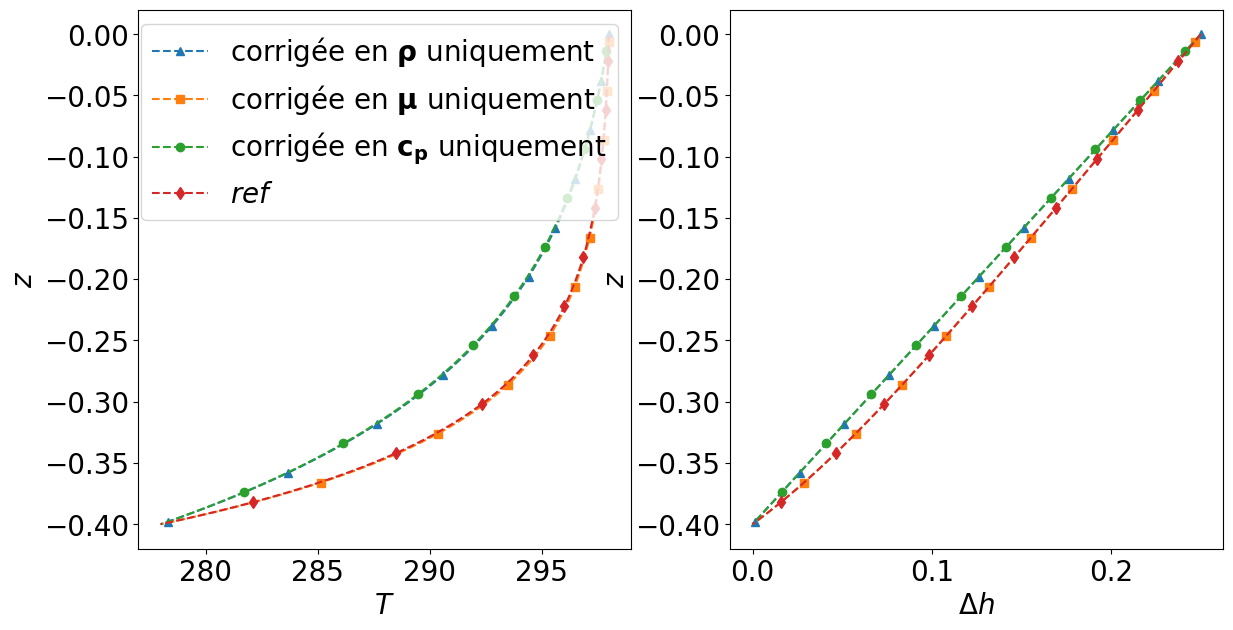

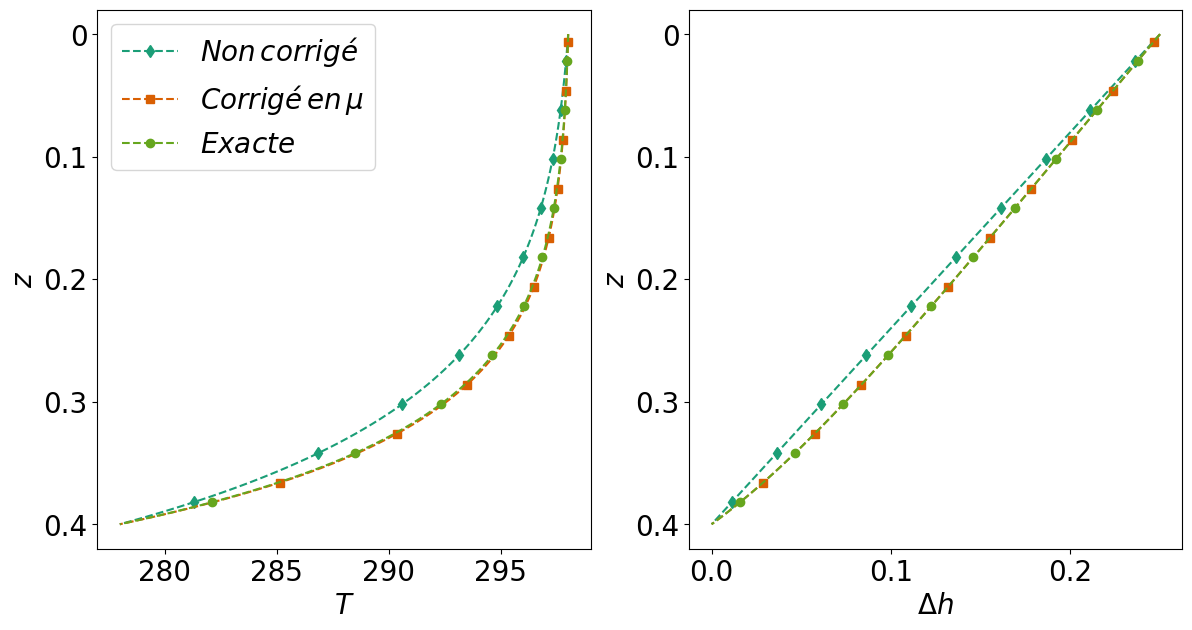

Erreur T :  1.745 [K]
Erreur H :  0.012 [m]


In [96]:
### Affichage solution dimensionnelle

temps, Z_dim, T_nco_dim, H_nco_dim = redimensionnement(dtau, [T_init], [H_init], h_adm, h_nap, h_riv, T_riv, T_nap, P)
temps, Z_dim, T_ref_dim, H_ref_dim = redimensionnement(dtau, T_ref, H_ref, h_adm, h_nap, h_riv, T_riv, T_nap, P)
temps, Z_dim, T_mu_dim , H_mu_dim  = redimensionnement(dtau, T_mu , H_mu , h_adm, h_nap, h_riv, T_riv, T_nap, P)
temps, Z_dim, T_cp_dim , H_cp_dim  = redimensionnement(dtau, T_cp , H_cp , h_adm, h_nap, h_riv, T_riv, T_nap, P)
temps, Z_dim, T_rho_dim, H_rho_dim = redimensionnement(dtau, T_rho, H_rho, h_adm, h_nap, h_riv, T_riv, T_nap, P)

afficher_H_T_dim(Z_dim, T_rho_dim, H_rho_dim, r"corrigée en $\bf{\rho}$ uniquement", if_add_curve=True, marker = fav_mark[0], markevery = (0,10), linestyle='--')
afficher_H_T_dim(Z_dim, T_mu_dim , H_mu_dim , r"corrigée en $\bf{\mu }$ uniquement", if_add_curve=True, marker = fav_mark[1], markevery = (2,10), linestyle='--')
afficher_H_T_dim(Z_dim, T_cp_dim , H_cp_dim , r"corrigée en $\bf{c_p }$ uniquement", if_add_curve=True, marker = fav_mark[2], markevery = (4,10), linestyle='--')
afficher_H_T_dim(Z_dim, T_ref_dim, H_ref_dim, r"$ ref  $", if_add_curve=False, marker = fav_mark[3], markevery = (6,10), linestyle='--')

afficher_H_T_dim(Z_dim, T_nco_dim, H_nco_dim, r"$ Non \, corrigé  $"    , if_add_curve=True, marker = fav_mark[3], markevery = (6,10), linestyle='--', couleur = couleurs[0])
afficher_H_T_dim(Z_dim, T_mu_dim , H_mu_dim , r"$ Corrigé \, en \, \mu$", if_add_curve=True, marker = fav_mark[1], markevery = (2,10), linestyle='--', couleur = couleurs[1])
afficher_H_T_dim(Z_dim, T_ref_dim, H_ref_dim, r"$ Exacte  $"            , if_add_curve=True, marker = fav_mark[2], markevery = (6,10), linestyle='--', couleur = couleurs[4])

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.set_yticks([0, -0.1, -0.2, -0.3, -0.4], labels = ["0", "0.1", "0.2", "0.3", "0.4"])
ax2.set_yticks([0, -0.1, -0.2, -0.3, -0.4], labels = ["0", "0.1", "0.2", "0.3", "0.4"])
# plt.savefig("T_DH_cor_ncor_mucor.svg", format = "svg", bbox_inches = "tight")
# plt.savefig("T_DH_cor_ncor_mucor.png", format = "png", bbox_inches = "tight")
plt.show()

print("Erreur T : ", np.around(np.max(np.abs(T_nco_dim - T_ref_dim[24])), 3), "[K]")
print("Erreur H : ", np.around(np.max(np.abs(H_nco_dim - H_ref_dim[24])), 3), "[m]")


# afficher_H_T_dim(Z_dim, T_nco_dim, H_nco_dim, r"$ Non \, corrigé  $"    , if_add_curve=True, marker = fav_mark[3], markevery = (6,10), linestyle='--', couleur = couleurs[0])
# afficher_H_T_dim(Z_dim, T_ref_dim, H_ref_dim, r"$ Exacte  $"            , if_add_curve=True, marker = fav_mark[2], markevery = (6,10), linestyle='--', couleur = couleurs[4])

# ax1 = plt.subplot(1,2,1)
# ax2 = plt.subplot(1,2,2)
# ax1.set_yticks([0, -0.1, -0.2, -0.3, -0.4], labels = ["0", "0.1", "0.2", "0.3", "0.4"])
# ax2.set_yticks([0, -0.1, -0.2, -0.3, -0.4], labels = ["0", "0.1", "0.2", "0.3", "0.4"])
# plt.savefig("T_DH_cor_ncor.png", format = "png", bbox_inches = "tight")
# plt.show()


On déduit de cet exemple que la correction en température n'est pas négligeable. Elle a donc été implémenté dans le code. Poir gagner du temps de calcul, seule la viscosité est corrigée. Les derniers graphs montrent que les corrections pour les deux autres paramètres sont négligeables.

Cependant, ce modèle ne fonctionne pas pour le cas où le sol contient deux couches. Les tests réalisés pour traiter ce cas plus complexe sont présenté dans le notebook "Tests_bicouche".

Une expliaction plausible de la raison de l'échec de la méthode est donnée. Des solutions pour résoudre le problèmes sont aussi présentées.

## Optimisation et erreurs

La suite de ce notebook présente l'optimisation, en terme de temps de calcul, qui a été implémentée dans le code. En effet cette dernière modification force à recalculer le profil de viscosité ($\mu$) à chaque itération et de l'utiliser pour changer les coefficients dans le schéma numérique.

Pour limiter le temps de calcul, il a été choisi de pas mettre à jour $\mu$ à tous les pas de temps mais seulement tous les 96 pas de temps, soit une fois par jour.

La suite de ce notebbok présente les erreurs dues à cette optimisation.

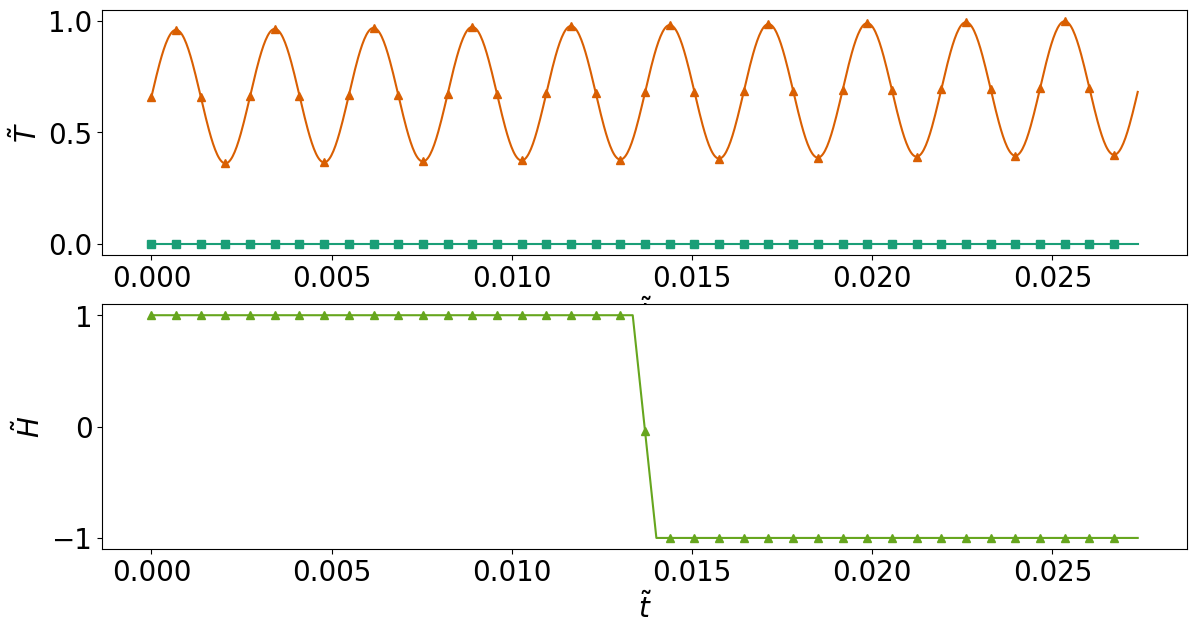

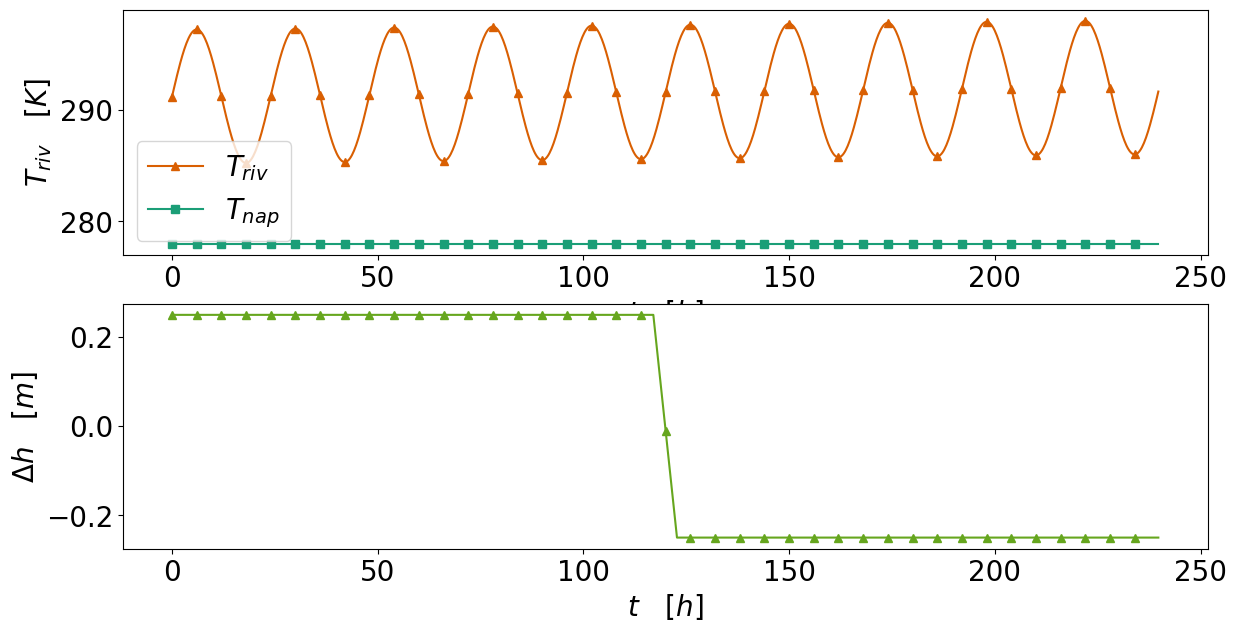

In [97]:
### Conditions aux limites dépendantes du temps

H_riv_max =  25e-2
H_riv_min = -25e-2

Nt = 10*24*4
dtau = 15*60 / P
Temps = np.arange(Nt)*dtau
Temps_dim = Temps*P
T_riv_dim_t = 273.15 + 18 + 5*np.sin(2*np.pi*Temps) + 6*np.sin(2*np.pi*Temps*365)
H_riv_dim_t = np.zeros(Nt)
H_riv_dim_t[0            :  5*24*4 - 3*4] = H_riv_max
H_riv_dim_t[5*24*4 - 3*4 :  5*24*4 + 3*4] = np.linspace(H_riv_max, H_riv_min, 6*4)
H_riv_dim_t[5*24*4 + 3*4 : 10*24*4      ] = H_riv_min

T_riv_ad_t = (T_riv_dim_t - T_nap)/(T_riv - T_nap)
H_riv_ad_t = (H_riv_dim_t - h_nap)/(h_riv - h_nap)


plt.figure(figsize = (14,7))
plt.subplot(2,1,1)
plt.plot(Temps, T_riv_ad_t  , color = couleurs[1], marker = fav_mark[0], markevery = 24, label = r"$T_{riv}$")
plt.plot(Temps, T_riv_ad_t*0, color = couleurs[0], marker = fav_mark[1], markevery = 24, label = r"$T_{nap}$")
plt.xlabel(r"$ \tilde{t} $", fontsize = 20)
plt.ylabel(r"$ \tilde{T} $", fontsize = 20)

plt.subplot(2,1,2)
plt.plot(Temps, H_riv_ad_t, color = couleurs[4], marker = fav_mark[0], markevery = 24)
plt.xlabel(r"$ \tilde{t} $", fontsize = 20)
plt.ylabel(r"$ \tilde{H} $", fontsize = 20)
plt.show()

plt.figure(figsize = (14,7))
plt.subplot(2,1,1)
plt.plot(Temps_dim/3600,   T_riv_dim_t        , color = couleurs[1], marker = fav_mark[0], markevery = 24, label = r"$T_{riv}$")
plt.plot(Temps_dim/3600, 0*T_riv_dim_t + T_nap, color = couleurs[0], marker = fav_mark[1], markevery = 24, label = r"$T_{nap}$")
plt.legend()
plt.xlabel(r"$ t \quad [h] $"      , fontsize = 20)
plt.ylabel(r"$ T_{riv} \quad [K] $", fontsize = 20)

plt.subplot(2,1,2)
plt.plot(Temps_dim/3600, H_riv_dim_t, color = couleurs[4], marker = fav_mark[0], markevery = 24)
plt.xlabel(r"$ t \quad [h] $"       , fontsize = 20)
plt.ylabel(r"$ \Delta h \quad [m] $", fontsize = 20)

# plt.savefig("cas_test.png", format = "png")
plt.show()

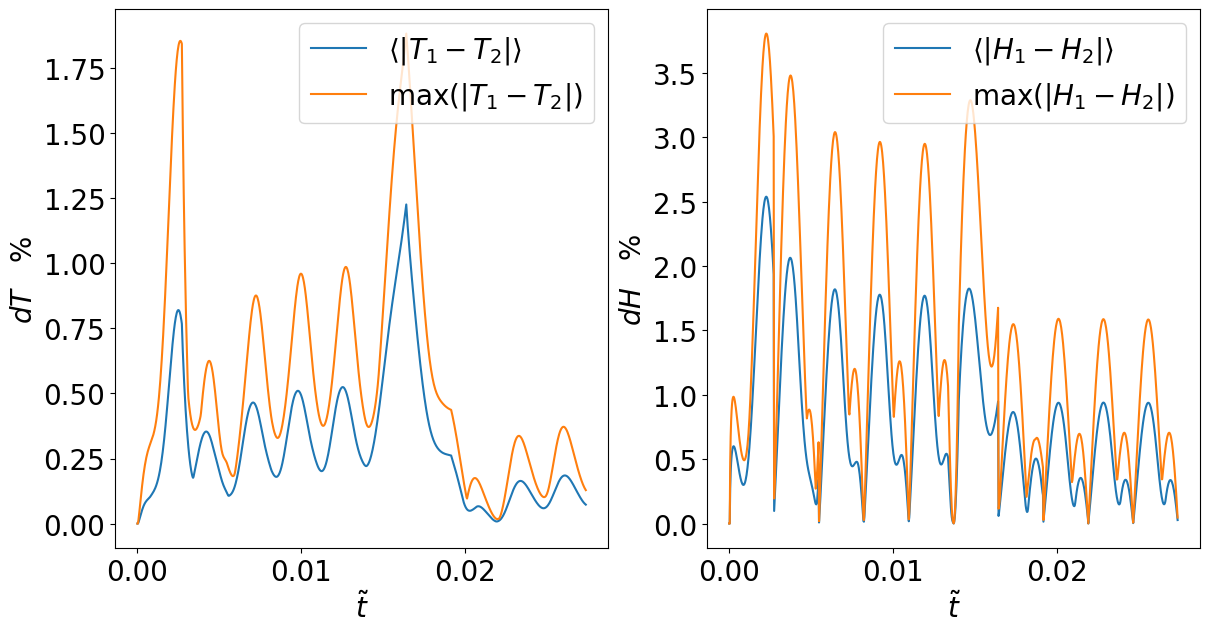

In [98]:
### Solution avec conditions aux limites dépendantes du temps
### Définition des conditions initiales
T_init_cor = T_ref[Ntconv - 1]
H_init_cor = H_ref[Ntconv - 1]
A_init_cor = A_ref[Ntconv - 1]
B_init_cor = B_ref[Ntconv - 1]
C_init_cor = C_ref[Ntconv - 1]
D_init_cor = D_ref[Ntconv - 1]

T_cor_temp , H_cor_temp , A_cor_temp , B_cor_temp , C_cor_temp , D_cor_temp  = boucle_temps(dtau, Nz, Nt, T_init_cor , H_init_cor , A_init_cor , B_init_cor , C_init_cor , D_init_cor , T_riv_ad= T_riv_ad_t, H_riv_ad= H_riv_ad_t)
T_ncor_temp, H_ncor_temp, A_ncor_temp, B_ncor_temp, C_ncor_temp , D_ncor_temp= boucle_temps(dtau, Nz, Nt, T_init_cor , H_init_cor , A_init_cor , B_init_cor , C_init_cor , D_init_cor , T_riv_ad= T_riv_ad_t, H_riv_ad= H_riv_ad_t, param_adjust=96)

afficher_difference (dtau, T_cor_temp, T_ncor_temp, H_cor_temp, H_ncor_temp)


L'erreur sur la charge n'est pas négligeable. Il est donc nécessaire de faire un ajustement plus fréquent. La case suivante et faite pour réaliser des tests.L'erreur descend en dessous de 1% quand on change la valeur des paramètres tout les 1h30.

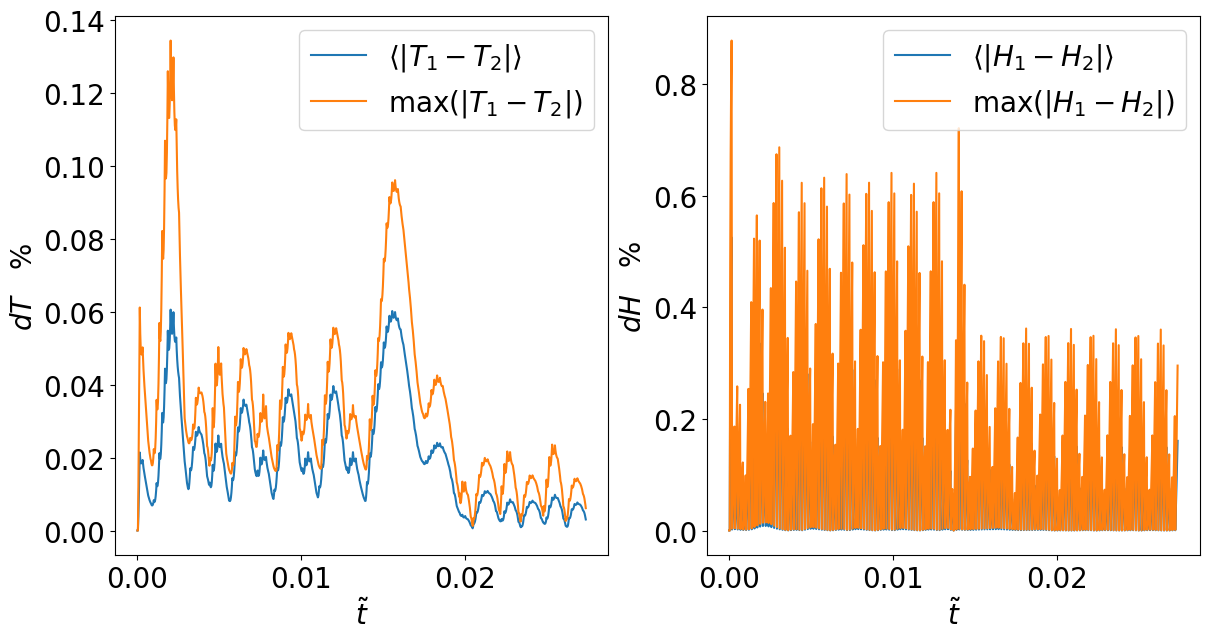

In [99]:
### Solution avec conditions aux limites dépendantes du temps
### Définition des conditions initiales
T_init_cor = T_ref[Ntconv - 1]
H_init_cor = H_ref[Ntconv - 1]
A_init_cor = A_ref[Ntconv - 1]
B_init_cor = B_ref[Ntconv - 1]
C_init_cor = C_ref[Ntconv - 1]
D_init_cor = D_ref[Ntconv - 1]

T_cor_temp , H_cor_temp , A_cor_temp , B_cor_temp , C_cor_temp , D_cor_temp  = boucle_temps(dtau, Nz, Nt, T_init_cor , H_init_cor , A_init_cor , B_init_cor , C_init_cor , D_init_cor , T_riv_ad= T_riv_ad_t, H_riv_ad= H_riv_ad_t)
T_ncor_temp, H_ncor_temp, A_ncor_temp, B_ncor_temp, C_ncor_temp , D_ncor_temp= boucle_temps(dtau, Nz, Nt, T_init_cor , H_init_cor , A_init_cor , B_init_cor , C_init_cor , D_init_cor , T_riv_ad= T_riv_ad_t, H_riv_ad= H_riv_ad_t, param_adjust=6)

afficher_difference (dtau, T_cor_temp, T_ncor_temp, H_cor_temp, H_ncor_temp)